In [ ]:
# import necessary libraries
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import torchvision
import torch
import numpy as np
import cv2
import os

# get the pretrained model from torchvision.models
# Note: pretrained=True will get the pretrained weights for the model.
# model.eval() to use the model for inference
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

model.eval()

# Class labels from official PyTorch documentation for the pretrained model
# Note that there are some N/A's 
# for complete list check https://tech.amikelive.com/node-718/what-object-categories-labels-are-in-coco-dataset/
# we will use the same list for this notebook
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
def get_prediction(img_path, threshold):
 
  img = Image.open(img_path)
  transform = T.Compose([T.ToTensor()])
  img = transform(img)
  pred = model([img])
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_boxes, pred_class
  


def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):
 
  boxes, pred_cls = get_prediction(img_path, threshold)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
  for i in range(len(boxes)):
    x1, y1 = int(boxes[i][0][0]), int(boxes[i][0][1])
    x2, y2 = int(boxes[i][1][0]), int(boxes[i][1][1])
    cv2.rectangle(img, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=rect_th)
    cv2.putText(img, pred_cls[i], (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, text_size, (0, 255, 0), thickness=text_th)
  plt.figure(figsize=(20,30))
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()


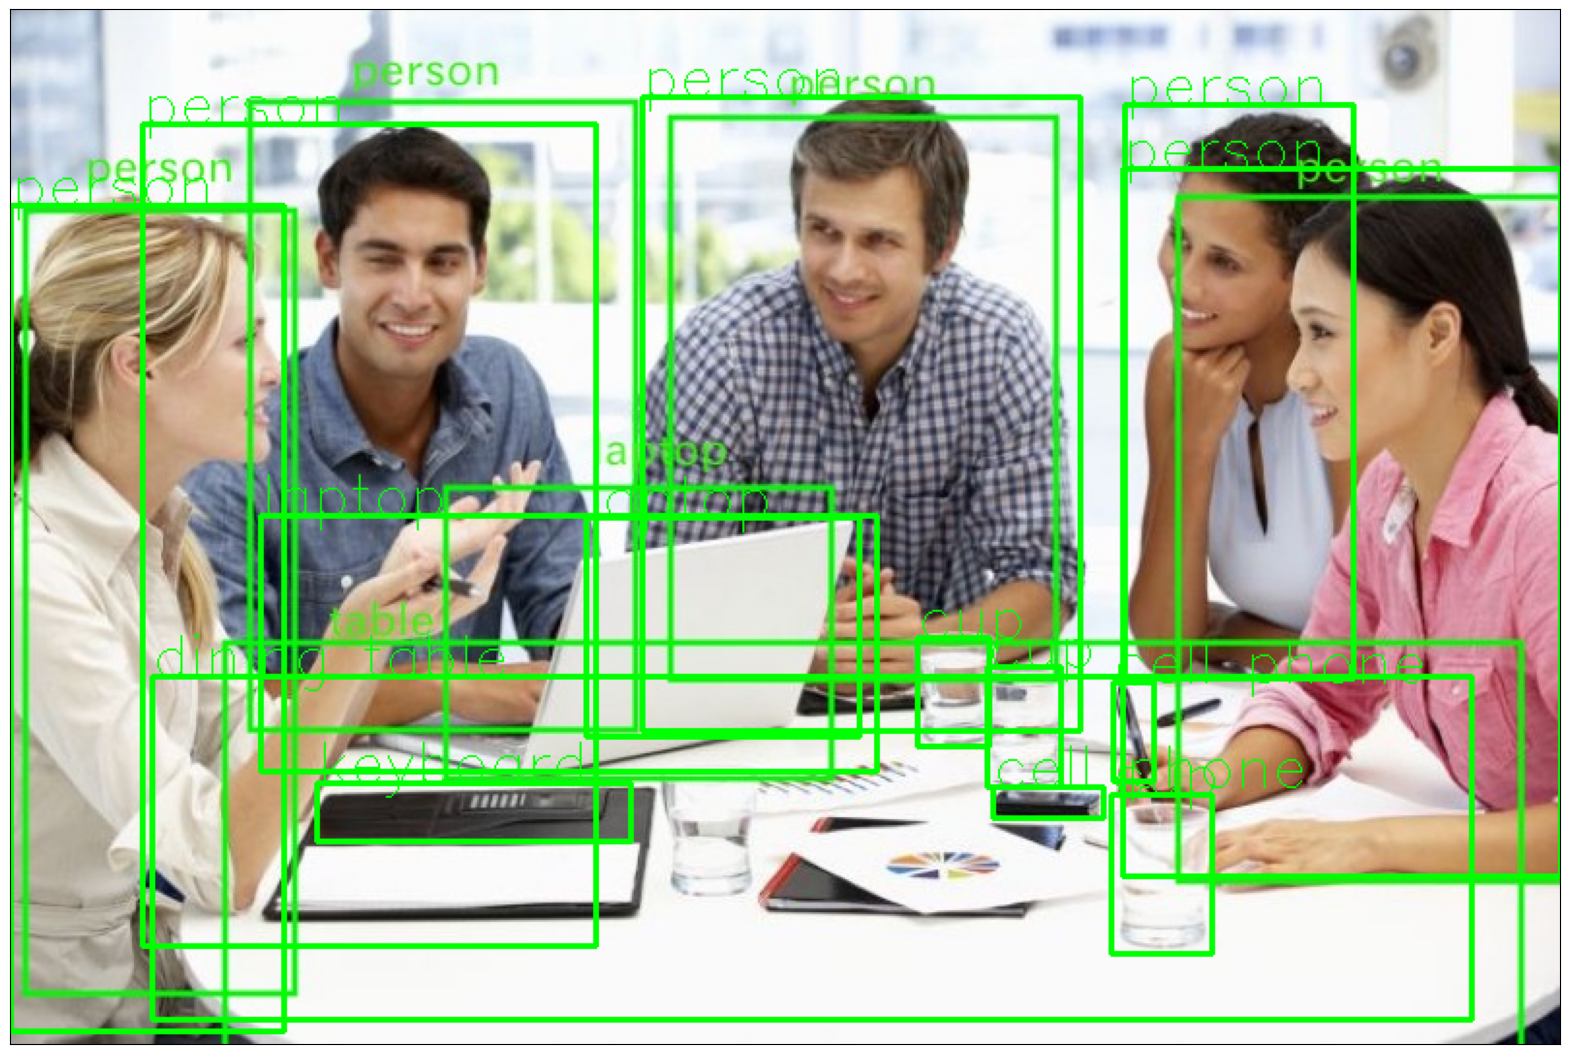

In [ ]:

object_detection_api('/content/11.jpg', rect_th=2, text_th=1, text_size=1)

In [ ]:
object_detection_api('/content/10.jpg', rect_th=2, text_th=1, text_size=1)
object_detection_api('/content/12.jpg', rect_th=2, text_th=1, text_size=1)
object_detection_api('/content/13.jpg', rect_th=2, text_th=1, text_size=1)

object_detection_api('/content/3.jpg', rect_th=2, text_th=1, text_size=1)
object_detection_api('/content/5.jpg', rect_th=2, text_th=1, text_size=1)
object_detection_api('/content/6.jpg', rect_th=2, text_th=1, text_size=1)
object_detection_api('/content/7.jpg', rect_th=2, text_th=1, text_size=1)
object_detection_api('/content/8.jpg', rect_th=2, text_th=1, text_size=1)

In [ ]:

import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array


def object_api(image_path):
  # Load the pre-trained VGG16 model
  model = VGG16(weights='imagenet')
 
  image = load_img(image_path, target_size=(224, 224))  # VGG16 requires input images of size (224, 224)
  image = img_to_array(image)  # Convert the image to a NumPy array
  image = preprocess_input(image)  # Preprocess the image according to VGG16 requirements
  image = tf.expand_dims(image, axis=0)  # Add a batch dimension

  # Run inference on the image
  predictions = model.predict(image)
  decoded_predictions = decode_predictions(predictions, top=3)  # Decode the predicted probabilities into class labels

  # Display the input image
  plt.imshow(np.uint8(img_to_array(load_img(image_path))))
  plt.axis('off')
  plt.title('Input Image')
  plt.show()


  # Display the predicted class labels and probabilities
  for i, (class_id, class_name, prob) in enumerate(decoded_predictions[0]):
      print(f'Top {i+1} Prediction: {class_name} (Probability: {prob:.2%})')

1/1 [==============================] - 1s 710ms/step


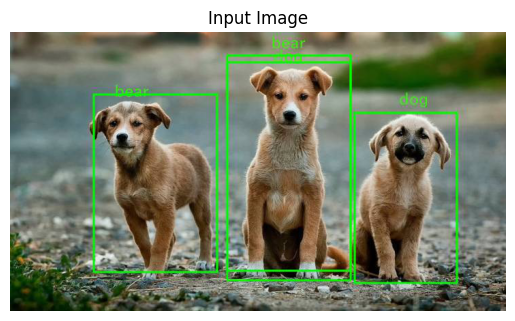

Top 1 Prediction: Saluki (Probability: 46.46%)
Top 2 Prediction: whippet (Probability: 46.26%)
Top 3 Prediction: borzoi (Probability: 3.29%)
1/1 [==============================] - 1s 1s/step


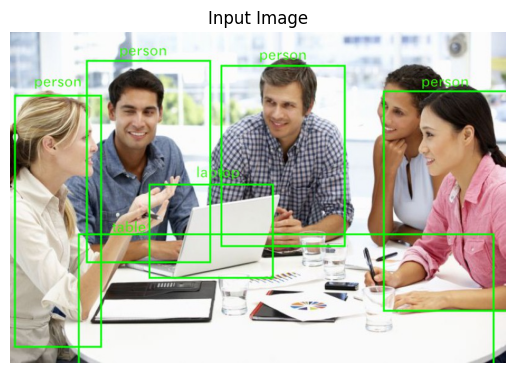

Top 1 Prediction: pajama (Probability: 32.85%)
Top 2 Prediction: kimono (Probability: 26.51%)
Top 3 Prediction: apron (Probability: 8.85%)
1/1 [==============================] - 1s 719ms/step


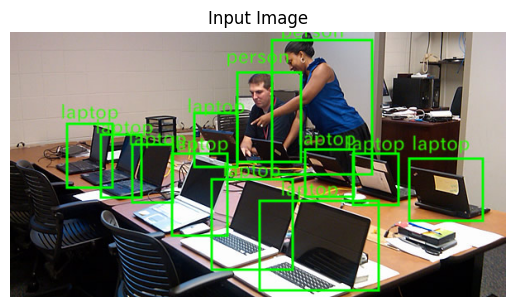

Top 1 Prediction: oscilloscope (Probability: 13.01%)
Top 2 Prediction: swab (Probability: 11.54%)
Top 3 Prediction: electric_guitar (Probability: 6.87%)
1/1 [==============================] - 1s 1s/step


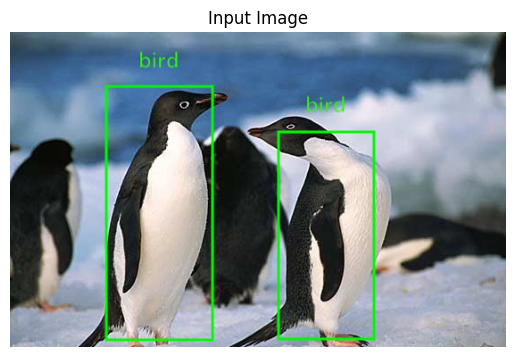

Top 1 Prediction: king_penguin (Probability: 99.86%)
Top 2 Prediction: magpie (Probability: 0.05%)
Top 3 Prediction: toucan (Probability: 0.04%)
1/1 [==============================] - 1s 706ms/step


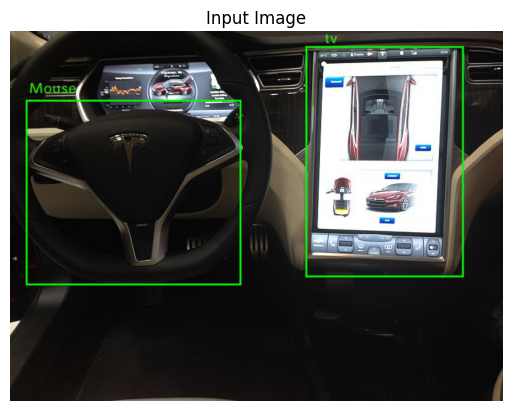

Top 1 Prediction: pay-phone (Probability: 48.43%)
Top 2 Prediction: parking_meter (Probability: 14.21%)
Top 3 Prediction: iPod (Probability: 10.82%)
1/1 [==============================] - 1s 704ms/step


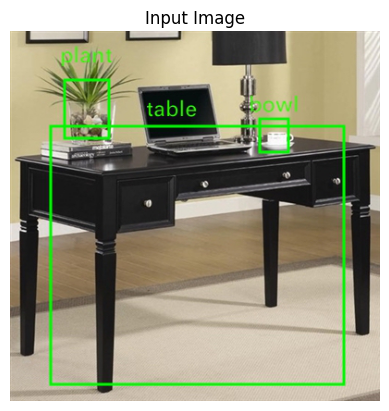

Top 1 Prediction: dining_table (Probability: 45.26%)
Top 2 Prediction: desk (Probability: 42.62%)
Top 3 Prediction: pool_table (Probability: 6.16%)
1/1 [==============================] - 1s 716ms/step


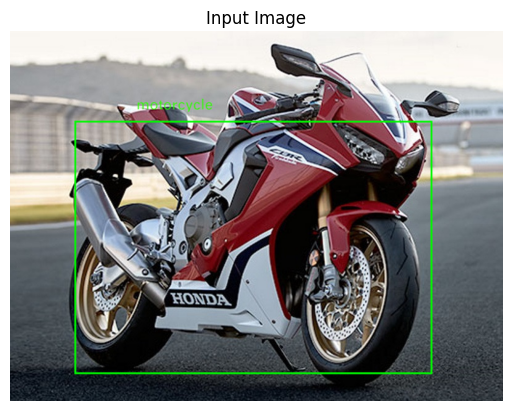

Top 1 Prediction: crash_helmet (Probability: 30.43%)
Top 2 Prediction: moped (Probability: 26.85%)
Top 3 Prediction: motor_scooter (Probability: 20.73%)
1/1 [==============================] - 1s 727ms/step


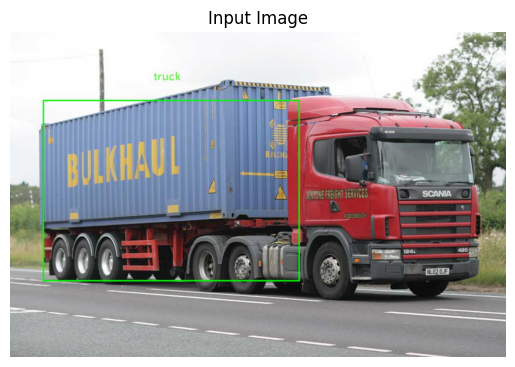

Top 1 Prediction: trailer_truck (Probability: 90.89%)
Top 2 Prediction: tow_truck (Probability: 6.67%)
Top 3 Prediction: moving_van (Probability: 1.51%)
1/1 [==============================] - 1s 1s/step


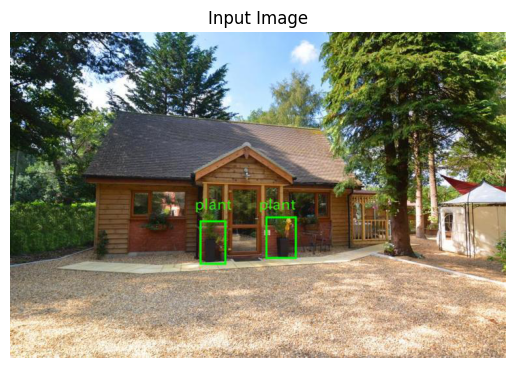

Top 1 Prediction: patio (Probability: 48.80%)
Top 2 Prediction: boathouse (Probability: 22.91%)
Top 3 Prediction: mobile_home (Probability: 6.87%)


In [ ]:

object_api('/content/10.jpg')
object_api('/content/11.jpg')
object_api('/content/13.jpg')
object_api('/content/1.jpg')
object_api('/content/3.jpg')
object_api('/content/5.jpg')
object_api('/content/6.jpg')
object_api('/content/7.jpg')
object_api('/content/8.jpg')



# 新段落